In [9]:
# Ensure the project root is in PATH.
import sys

sys.path.append("../")
# All imports of our code are relative to the project root.

from backtester.backtester import Backtester
from backtester.datamodel import TradingState, OrderDepth, Order, Listing
import matplotlib.pyplot as plt

from backtester.log import Log
import numpy as np
import pandas as pd
import sys
import os






# concatenates multiple days of historical data into 1.
# drops day column and replaces it with continuous timestamps.
# i.e. day -1 timestamp 0 becomes just timestamp 1,000,000
def concatenate_historical_data(data: list[pd.DataFrame]) -> pd.DataFrame:
    output = data[0]

    for i in range(1, len(data), 1):
        timeshift = output.iloc[-1]["timestamp"] + 100  # 100 for next day
        next_day_copy = data[i].copy()
        next_day_copy["timestamp"] += timeshift

        output = pd.concat([output, next_day_copy])

    return output

In [10]:
market_data_round_3_day_0 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_0.csv"), sep=";")
market_data_round_3_day_1 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_1.csv"), sep=";")
market_data_round_3_day_2 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_2.csv"), sep=";")

trades_round_3_day_0 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_0.csv"), sep=";")
trades_round_3_day_1 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_1.csv"), sep=";")
trades_round_3_day_2 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_2.csv"), sep=";")


market_data_round_3_all3days = concatenate_historical_data([market_data_round_3_day_0, market_data_round_3_day_1, market_data_round_3_day_2])
trades_round_3_all3days = concatenate_historical_data([trades_round_3_day_0, trades_round_3_day_1, market_data_round_3_day_2])

In [11]:
market_data = market_data_round_3_all3days.copy()
trade_history = trades_round_3_all3days.copy()


croissants = market_data[market_data["product"] == "CROISSANTS"].reset_index(drop=True)
jams = market_data[market_data["product"] == "JAMS"].reset_index(drop=True)
djembes = market_data[market_data["product"] == "DJEMBES"].reset_index(drop=True)
basket1 = market_data[market_data["product"] == "PICNIC_BASKET1"].reset_index(drop=True)
basket2 = market_data[market_data["product"] == "PICNIC_BASKET2"].reset_index(drop=True)


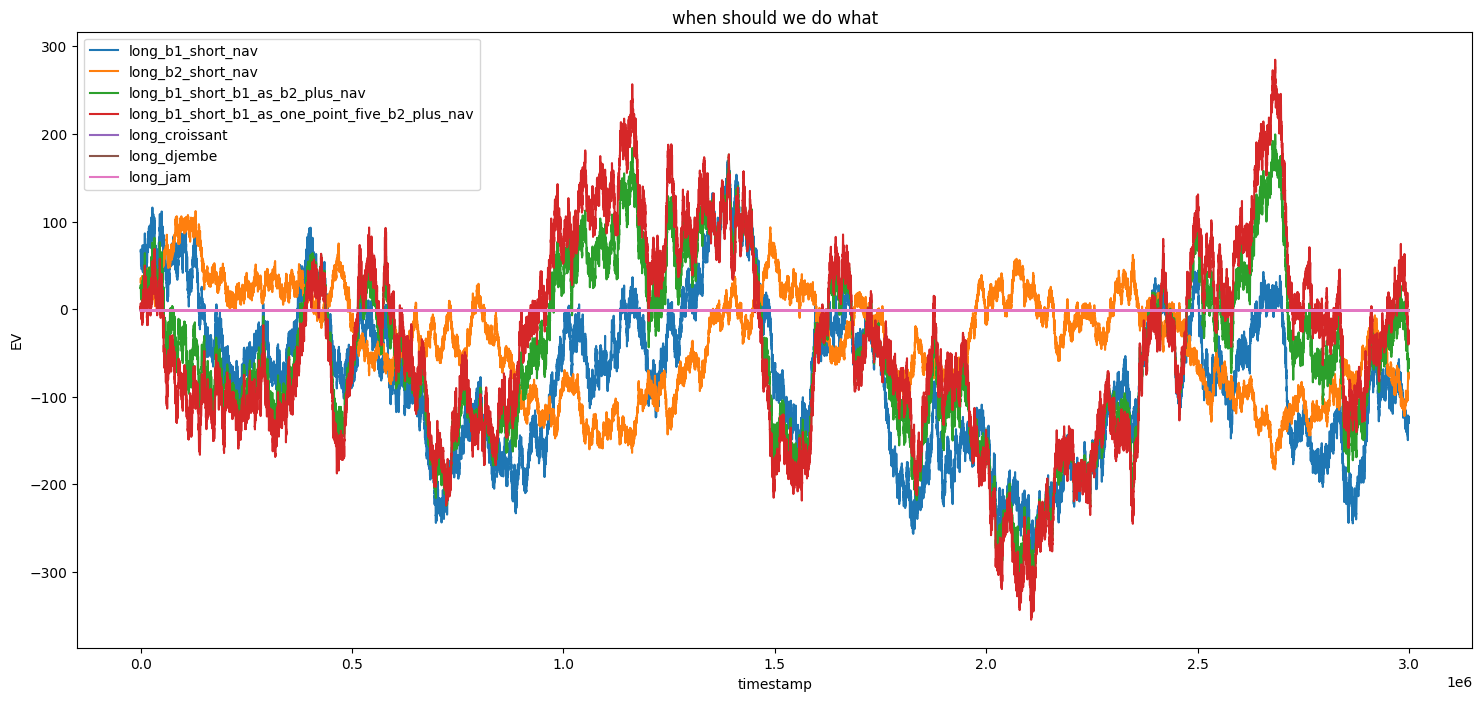

1.2057666666666667
1.2644666666666666
1.6177666666666666
9.192866666666667
5.1976


In [12]:
CROISSANTS = "CROISSANTS"
DJEMBES = "DJEMBES"
JAMS = "JAMS"
KELP = "KELP"
PICNIC_BASKET1 = "PICNIC_BASKET1"
PICNIC_BASKET2 = "PICNIC_BASKET2"
RAINFOREST_RESIN = "RAINFOREST_RESIN"
SQUID_INK = "SQUID_INK"
VOLCANIC_ROCK = "VOLCANIC_ROCK"
VOLCANIC_ROCK_VOUCHER_10000 = "VOLCANIC_ROCK_VOUCHER_10000"
VOLCANIC_ROCK_VOUCHER_10250 = "VOLCANIC_ROCK_VOUCHER_10250"
VOLCANIC_ROCK_VOUCHER_10500 = "VOLCANIC_ROCK_VOUCHER_10500"
VOLCANIC_ROCK_VOUCHER_9500 = "VOLCANIC_ROCK_VOUCHER_9500"
VOLCANIC_ROCK_VOUCHER_9750 = "VOLCANIC_ROCK_VOUCHER_9750"


# every sequence of hedging trades is cycle detection??
# want to find the cycle with the maximum profit? i think this is NP hard.
# thats fine though.

# def short_b1_long_

profitability = {
    "timestamp": [],
    "long_b1_short_nav": [],
    "short_b1_long_nav": [],
    "long_b2_short_nav": [],
    "short_b2_long_nav": [],
    "long_b1_short_b1_as_b2_plus_nav": [],
    "short_b1_long_b1_as_b2_plus_nav": [],
    "long_b1_short_b1_as_one_point_five_b2_plus_nav": [],
    "short_b1_long_b1_as_one_point_five_b2_plus_nav": [],
    "long_croissant": [],
    "short_croissant": [],
    "long_djembe": [],
    "short_djembe": [],
    "long_jam": [],
    "short_jam": [],
}


croissants_prices = croissants["mid_price"]
jams_prices = jams["mid_price"]
djembes_prices = djembes["mid_price"]
basket1_prices = basket1["mid_price"]
basket2_prices = basket2["mid_price"]

croissants_spread = np.abs(croissants["bid_price_1"] - croissants["ask_price_1"])
djembes_spread = np.abs(djembes["bid_price_1"] - djembes["ask_price_1"])
jams_spread = np.abs(jams["bid_price_1"] - jams["ask_price_1"])


profitability_df = pd.DataFrame()

profitability_df["timestamp"] = np.unique(market_data["timestamp"])
profitability_df["c"] = croissants["mid_price"]
profitability_df["j"] = jams["mid_price"]
profitability_df["d"] = djembes["mid_price"]
profitability_df["b1"] = basket1["mid_price"]
profitability_df["b2"] = basket2["mid_price"]

profitability_df["spr_c"] = abs(croissants["bid_price_1"] - croissants["ask_price_1"])
profitability_df["spr_j"] = abs(jams["bid_price_1"] - jams["ask_price_1"])
profitability_df["spr_d"] = abs(djembes["bid_price_1"] - djembes["ask_price_1"])
profitability_df["spr_b1"] = abs(basket1["bid_price_1"] - basket1["ask_price_1"])
profitability_df["spr_b2"] = abs(basket2["bid_price_1"] - basket2["ask_price_1"])


profitability_df["sb1"] = profitability_df["b1"] - 6 * profitability_df["c"] - 3 * profitability_df["j"] - 1 * profitability_df["d"]
profitability_df["sb2"] = profitability_df["b2"] - 4 * profitability_df["c"] - 2 * profitability_df["j"]

profitability_df["b1_as_b2_plus_nav"] = profitability_df["b2"] + 2 * profitability_df["c"] + profitability_df["j"] + profitability_df["d"]
profitability_df["b1_as_one_point_five_b2_plus_nav"] = 1.5 * profitability_df["b2"] + profitability_df["d"]

profitability_df["long_b1_short_nav"] = (
    -profitability_df["sb1"] - profitability_df["spr_b1"] - 6 * profitability_df["spr_c"] - 3 * profitability_df["spr_j"] - profitability_df["spr_d"]
)
profitability_df["short_b1_long_nav"] = (
    profitability_df["sb1"] - profitability_df["spr_b1"] - 6 * profitability_df["spr_c"] - 3 * profitability_df["spr_j"] - profitability_df["spr_d"]
)
profitability_df["long_b2_short_nav"] = (
    -profitability_df["sb2"] - profitability_df["spr_b2"] - 4 * profitability_df["spr_c"] - 2 * profitability_df["spr_j"]
)
profitability_df["short_b2_long_nav"] = (
    profitability_df["sb2"] - profitability_df["spr_b2"] - 4 * profitability_df["spr_c"] - 2 * profitability_df["spr_j"]
)

profitability_df["long_b1_short_b1_as_b2_plus_nav"] = (
    -(profitability_df["b1"] - profitability_df["b1_as_b2_plus_nav"])
    - profitability_df["spr_b1"]
    - profitability_df["spr_b2"]
    - 2 * profitability_df["spr_c"]
    - profitability_df["spr_j"]
)
profitability_df["short_b1_long_b1_as_b2_plus_nav"] = (
    (profitability_df["b1"] - profitability_df["b1_as_b2_plus_nav"])
    - profitability_df["spr_b1"]
    - profitability_df["spr_b2"]
    - 2 * profitability_df["spr_c"]
    - profitability_df["spr_j"]
)

profitability_df["long_b1_short_b1_as_one_point_five_b2_plus_nav"] = (
    -(profitability_df["b1"] - profitability_df["b1_as_one_point_five_b2_plus_nav"])
    - profitability_df["spr_b1"]
    - 1.5 * profitability_df["spr_b2"]
    - profitability_df["spr_d"]
)
profitability_df["short_b1_long_b1_as_one_point_five_b2_plus_nav"] = (
    (profitability_df["b1"] - profitability_df["b1_as_one_point_five_b2_plus_nav"])
    - profitability_df["spr_b1"]
    - 1.5 * profitability_df["spr_b2"]
    - profitability_df["spr_d"]
)

profitability_df["long_croissant"] = -profitability_df["spr_c"]
profitability_df["short_croissant"] = -profitability_df["spr_c"]
profitability_df["long_djembe"] = -profitability_df["spr_d"]
profitability_df["short_djembe"] = -profitability_df["spr_d"]
profitability_df["long_jam"] = -profitability_df["spr_j"]
profitability_df["short_jam"] = -profitability_df["spr_j"]

profitability = profitability_dict = profitability_df.to_dict(orient="list")

profitability_df


plt.figure(figsize=(18, 8))
for key in profitability.keys():
    if key == "timestamp" or key.find("long") != 0:
        continue
    plt.plot(profitability["timestamp"], profitability[key], label=key)
plt.title("when should we do what")
plt.xlabel("timestamp")
plt.ylabel("EV")
plt.legend()
plt.show()


print(np.mean(profitability_df["spr_c"]))
print(np.mean(profitability_df["spr_d"]))
print(np.mean(profitability_df["spr_j"]))
print(np.mean(profitability_df["spr_b1"]))
print(np.mean(profitability_df["spr_b2"]))

-80.18901666666666


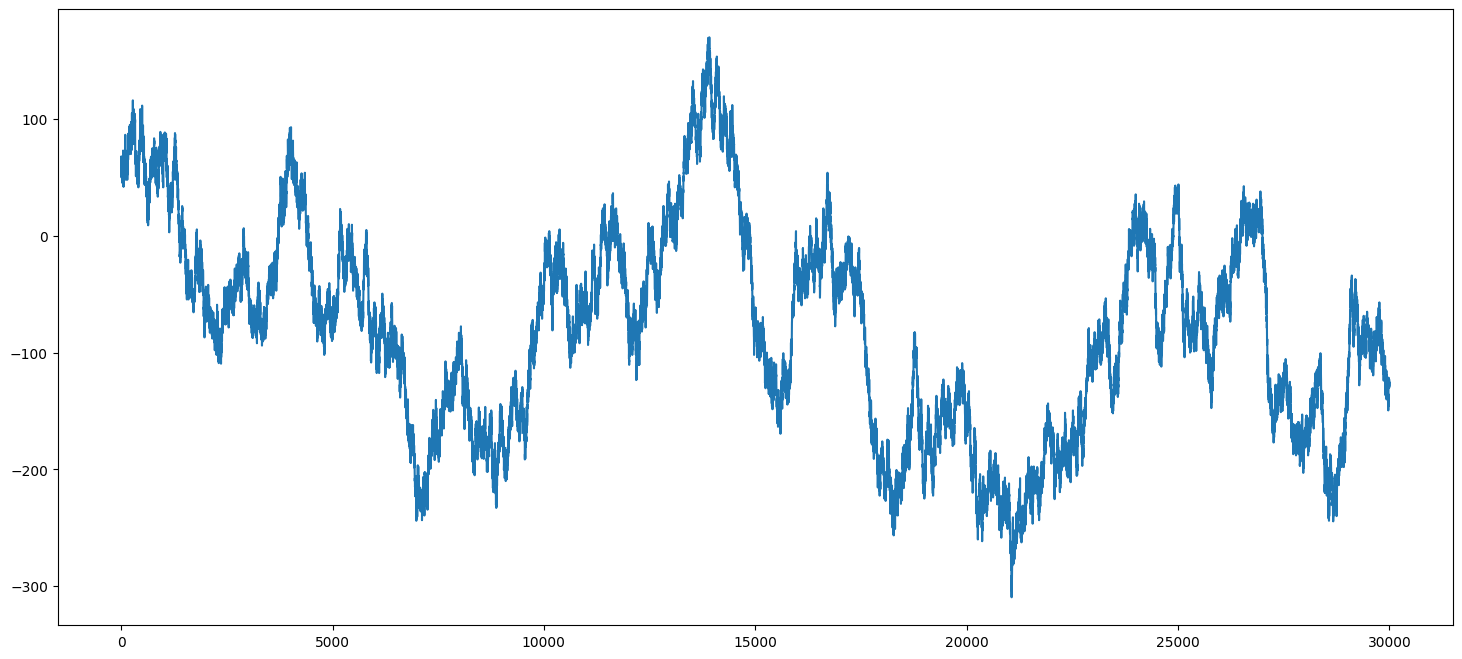

In [30]:
plt.figure(figsize=(18, 8))

plt.plot(profitability_df['long_b1_short_nav'])
print(np.mean(profitability_df['long_b1_short_nav']))
# plt.plot(profitability_df['long_b1_short_nav'].rolling(200).mean())
# plt.plot(profitability_df['long_b1_short_nav'] - profitability_df['long_b1_short_nav'].rolling(200).mean())
plt.show()